![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods</center>
## <center>  Lecture 11 - Non-linear Least Squares</center>
### <center> Line Search </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/11_NonLinearLeastSquares/MainLinearSearch.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 14})

### Rosenbrock function:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/300px-Rosenbrock_function.svg.png)
$$f\left(x_{1},x_{2}\right)=\left(1-x_{1}\right)^{2}+100\left(x_{2}-x_{1}^{2}\right)^{2}$$
$$\nabla f\left(x_{1},x_{2}\right)=\left[\begin{matrix}-2\left(1-x_{1}\right)-400x_{1}\left(x_{2}-x_{1}^{2}\right)\\
200\left(x_{2}-x_{1}^{2}\right)
\end{matrix}\right]$$

In [2]:
def f(vX):
    x1 = vX[0]
    x2 = vX[1]
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

def Df(vX):
    x1 = vX[0]
    x2 = vX[1]
    return np.array([-2 * (1 - x1) - 400*x1*(x2 - x1**2),
                     200 * (x2 - x1**2)])

### Symbolic Python (SymPy):

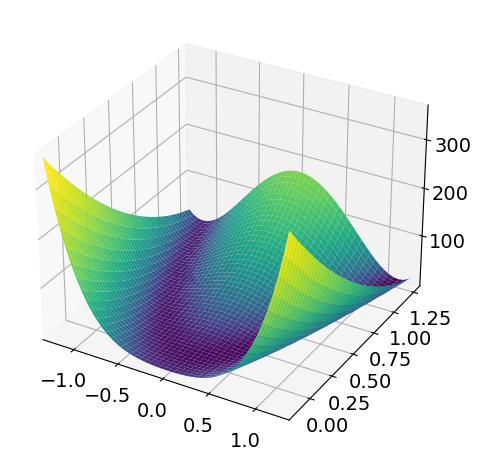

In [3]:
from sympy          import symbols
from sympy.plotting import plot3d

x1, x2 = symbols('x_1 x_2')
Color  = lambda x1, x2: np.log(f([x1, x2])+10)
plot3d(f([x1, x2]), (x1, -1.3, 1.3), (x2, -.2, 1.3), surface_color=Color);

### Vanilla gradient descent:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)$$

In [4]:
import time

def GradientDescent(f, Df, vX0, µ, K):
    vF    = np.full(K, np.nan)
    vTime = np.full(K, np.nan)

    vX       = vX0.copy()
    vF   [0] = f(vX)
    vTime[0] = time.time()
    for ii in range(1, K):
        vX        -= µ * Df(vX)
        vF   [ii]  = f(vX)
        vTime[ii]  = time.time()

    vTime -= vTime[0]
    return vF, vTime

### Gradient descent with line search:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\alpha^{\left(t\right)}\nabla f\left(\boldsymbol{x}\right)$$
* **while** $\psi\left(\alpha\right)>\psi\left(0\right)+c\alpha\psi'\left(0\right)$:  
    * $\alpha\leftarrow\frac{1}{2}\alpha$
    
where:
$$\psi\left(\alpha\right):=f\left(\boldsymbol{x}^{\left(t\right)}+\alpha\boldsymbol{h}\right)$$
$$\boldsymbol{h}=-\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)$$
$$\psi\left(0\right)=f\left(\boldsymbol{x}^{\left(t\right)}\right)$$
$$m=\psi'\left(0\right)=\left\langle \nabla f\left(\boldsymbol{x}^{\left(t\right)}\right),\boldsymbol{h}\right\rangle $$

In [5]:
def GradientDescentWithLineSearch(f, Df, vX0, α0, c, K):
    vF    = np.full(K, np.nan)
    vTime = np.full(K, np.nan)

    vX       = vX0.copy()
    vF   [0] = f(vX)
    vTime[0] = time.time()
    for ii in range(1, K):
        vG   = Df(vX)             #-- gradient
        vH   = -vG                #-- descent direction
        m    = np.inner(vG, vH)   #-- ψ'(0) (slope)
        f0   = vF[ii-1]

        #-- Line search:
        α    = α0
        fα   = f(vX + α * vH)
        while fα > f0 + c * α * m:
            α  *= .5
            fα  = f(vX + α * vH)

#         α0        = 4 * α
        vX        += α * vH
        vF   [ii]  = fα
        vTime[ii]  = time.time()
        
    vTime -= vTime[0]
    return vF, vTime

### Run the algorithms:

In [6]:
vX0                   = np.array([1.0, 1.1])

vObjectiveGD, vTimeGD = GradientDescent              (f, Df, vX0, µ=.0020,       K=10000)
vObjectiveLS, vTimeLS = GradientDescentWithLineSearch(f, Df, vX0, α0=.25, c=0.5, K=1000 )

#### Plots:

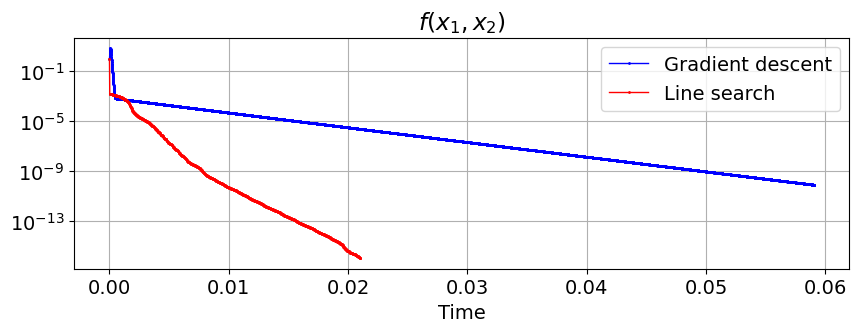

In [7]:
def TimeAxis(vT):
    return np.linspace(vT[0], vT[-1], len(vT))

plt.figure(figsize=(10, 3))
plt.plot  (TimeAxis(vTimeGD), vObjectiveGD, c='b', lw=1, marker='.', ms=2, label='Gradient descent')
plt.plot  (TimeAxis(vTimeLS), vObjectiveLS, c='r', lw=1, marker='.', ms=2, label='Line search')
plt.title ('$f(x_1, x_2)$')
plt.xlabel('Time')
plt.yscale('log')
plt.grid  ()
plt.legend()
plt.show  ()

### Example II:
$$f\left(\boldsymbol{x}\right)=\left\Vert \boldsymbol{y}-\boldsymbol{H}\boldsymbol{x}\right\Vert _{2}^{2}$$
$$\nabla f=-2\boldsymbol{H}^{T}\left(\boldsymbol{y}-\boldsymbol{H}\boldsymbol{x}\right)$$

In [8]:
Dx = 500                      
Dy = 1000
mH = np.random.randn(Dy, Dx) #-- some random matrix
vX = np.random.randn(Dx)     #-- true x
vY = mH @ vX                 #-- y

def f(vX):
    return np.linalg.norm(vY - mH @ vX)**2

def Df(vX):
    return -2 * mH.T @ (vY - mH @ vX)

In [9]:
vX0                   = np.random.randn(Dx)
vObjectiveGD, vTimeGD = GradientDescent              (f, Df, vX0, µ=.0003,       K=100)
vObjectiveLS, vTimeLS = GradientDescentWithLineSearch(f, Df, vX0, α0=.1, c=.5, K=50)

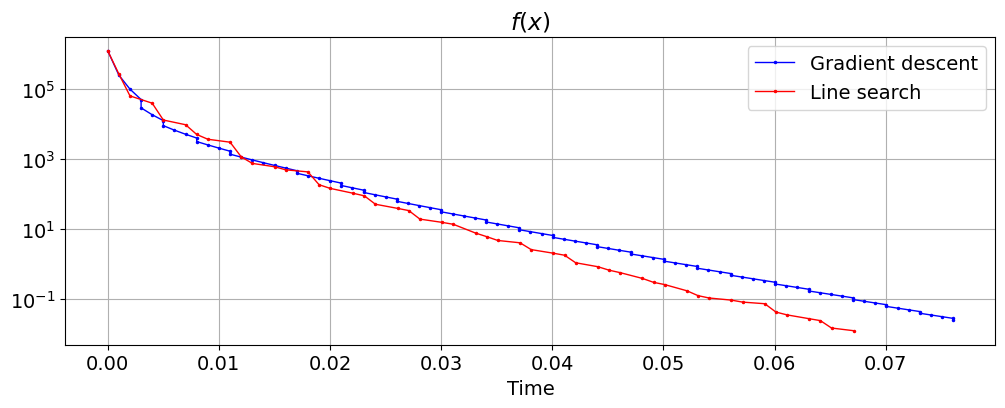

In [10]:
plt.figure(figsize=(12, 4))
plt.plot  (vTimeGD, vObjectiveGD, c='b', lw=1, marker='.', ms=3, label='Gradient descent')
plt.plot  (vTimeLS, vObjectiveLS, c='r', lw=1, marker='.', ms=3, label='Line search')
plt.title ('$f(x)$')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()
plt.grid  ()
plt.show  ()